In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_set = np.genfromtxt("hw04_data_set.csv", skip_header=1, delimiter = ",", )

# get x and y values
x_train = data_set[:100,0]
y_train = data_set[:100,1].astype(int)
x_test = data_set[100:,0]
y_test = data_set[100:,1].astype(int)

In [3]:
origin = 0
bin_width = 3

max_x = max(x_train)

left_borders = np.arange(origin, max_x, bin_width)
right_borders = np.arange(origin + bin_width, max_x + bin_width, bin_width)
data_interval = np.arange(origin, max_x, 0.001)

## Regressogram

In [4]:
def regressogram(index):
    sums = 0
    count = 0
    for i in range(x_train.shape[0]):
        if(left_borders[index] < x_train[i] and x_train[i] <= right_borders[index]):
            sums +=  y_train[i]
            count += 1
    val = sums / count
    return val

In [5]:
p_hat = [regressogram(i) for i in range(left_borders.shape[0])]

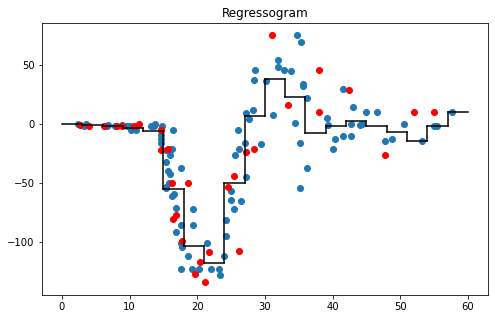

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="red")
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [p_hat[b], p_hat[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [p_hat[b], p_hat[b + 1]], "k-")    
plt.title("Regressogram")
plt.show()

In [7]:
rmse = 0
for i in range(0,len(x_test)):
    for j in range(0,len(left_borders)):
        if(left_borders[j] < x_test[i] and x_test[i] <= right_borders[j]):
            err = (y_test[i] - p_hat[int((x_test[i]-origin)/bin_width)])**2
            rmse += err
result = np.sqrt(rmse / len(x_test))
print("Regressogram => RMSE is", result, " when h is", bin_width)

Regressogram => RMSE is 24.61388564383952  when h is 3


## Mean Smoother

In [8]:
def mean_smoother(index):
    sums = 0
    count = 0
    bin_width = 3
    for i in range(x_train.shape[0]):
        if(np.abs((data_interval[index]-x_train[i])/bin_width) < 0.8):
            sums +=  y_train[i]
            count += 1
    val = sums / count
    return val

In [9]:
p_hat_mean_sm = np.array([mean_smoother(i) for i in range(data_interval.shape[0])])

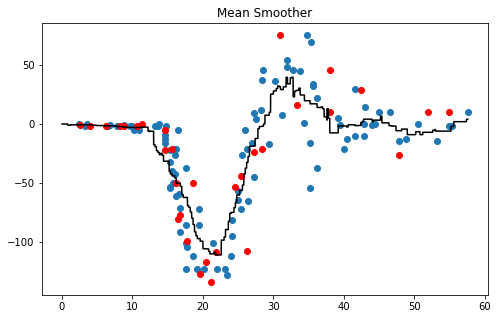

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="red")
plt.plot(data_interval, p_hat_mean_sm, "k")
plt.title("Mean Smoother")
plt.show()

In [11]:
err = [(y_test[i] - p_hat_mean_sm[int((x_test[i]-origin)*1000)])**2 for i in range(len(x_test))]
rmse = np.sqrt(np.sum(err) / len(x_test))
print("Mean Smoother => RMSE is", rmse, " when h is", bin_width)

Mean Smoother => RMSE is 23.7327855399617  when h is 3


## Kernel Smoother

In [12]:
def kernel_smoother(index):
    sums = 0
    counts = 0
    for i in range(0,len(x_train)):
        x = (data_interval[index] - x_train[i]) / bin_width
        g = 1/np.sqrt(2* np.pi) * np.exp(-1* x ** 2 / 2)
        counts += g
        sums += (g * y_train[i])
        
    val = sums / counts
    return val

In [13]:
bin_width = 1
p_hat_kernel_smth = np.array([kernel_smoother(i) for i in range(data_interval.shape[0])])

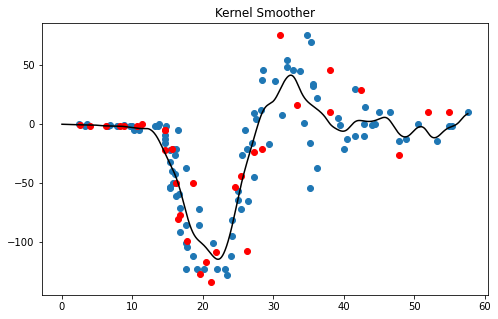

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="red")
plt.plot(data_interval, p_hat_kernel_smth, "k")
plt.title("Kernel Smoother")
plt.show()

In [15]:
err = [(y_test[i] - p_hat_kernel_smth[int((x_test[i]-origin)*1000)])**2 for i in range(len(x_test))]
rmse = np.sqrt(np.sum(err) / len(x_test))
print("Kernel Smoother => RMSE is", rmse, " when h is", bin_width)

Kernel Smoother => RMSE is 24.065852572908373  when h is 1
